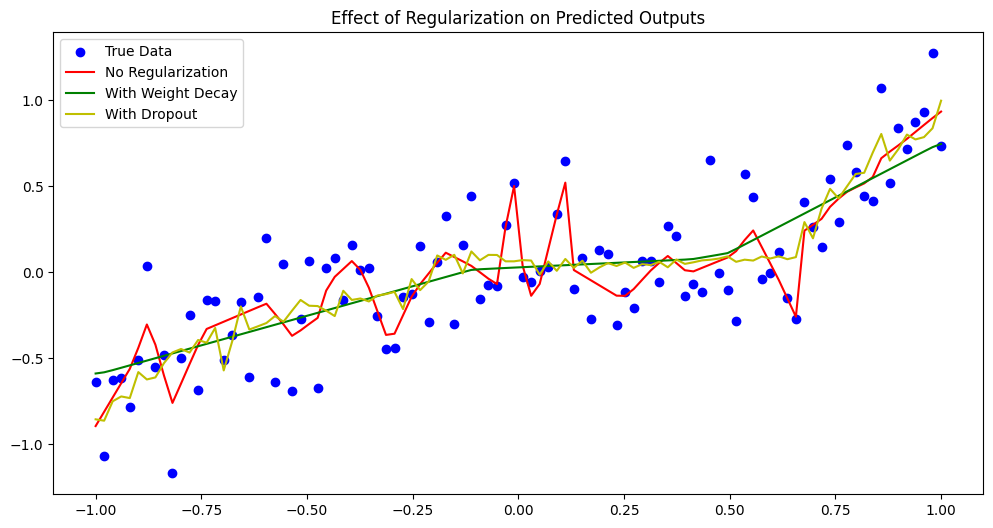

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Generate Synthetic Data
x = np.linspace(-1, 1, 100)[:, None]
y = x**3 + 0.3*np.random.randn(100)[:, None]

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 2. Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self, dropout=False):
        super(SimpleNN, self).__init__()
        self.dropout = dropout
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        if dropout:
            self.drop_layer = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        if self.dropout:
            x = self.drop_layer(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Train models
def train_model(model, weight_decay=0.0):
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
    criterion = nn.MSELoss()
    epochs = 2000

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

    return model

# No regularization
model_plain = train_model(SimpleNN())

# With weight decay
model_weight_decay = train_model(SimpleNN(), weight_decay=0.01)

# With dropout
model_dropout = train_model(SimpleNN(dropout=True))

# 4. Visualization
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', label='True Data')
plt.plot(x, model_plain(x_tensor).detach().numpy(), 'r-', label='No Regularization')
plt.plot(x, model_weight_decay(x_tensor).detach().numpy(), 'g-', label='With Weight Decay')
plt.plot(x, model_dropout(x_tensor).detach().numpy(), 'y-', label='With Dropout')
plt.legend()
plt.title('Effect of Regularization on Predicted Outputs')
plt.show()


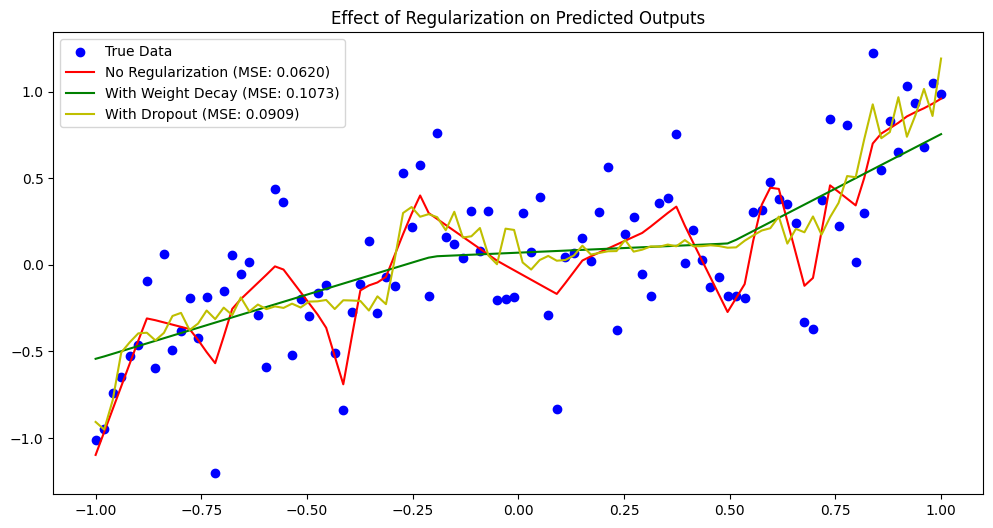

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Generate Synthetic Data
x = np.linspace(-1, 1, 100)[:, None]
y = x**3 + 0.3*np.random.randn(100)[:, None]

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 2. Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self, dropout=False):
        super(SimpleNN, self).__init__()
        self.dropout = dropout
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        if dropout:
            self.drop_layer = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        if self.dropout:
            x = self.drop_layer(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Train models and compute MSE
def train_model(model, weight_decay=0.0):
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
    criterion = nn.MSELoss()
    epochs = 2000

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

    # Calculate MSE for trained model
    mse = criterion(model(x_tensor), y_tensor).item()
    return model, mse

model_plain, mse_plain = train_model(SimpleNN())
model_weight_decay, mse_weight_decay = train_model(SimpleNN(), weight_decay=0.01)
model_dropout, mse_dropout = train_model(SimpleNN(dropout=True))

# 4. Visualization with Summary
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', label='True Data')
plt.plot(x, model_plain(x_tensor).detach().numpy(), 'r-',
         label=f'No Regularization (MSE: {mse_plain:.4f})')
plt.plot(x, model_weight_decay(x_tensor).detach().numpy(), 'g-',
         label=f'With Weight Decay (MSE: {mse_weight_decay:.4f})')
plt.plot(x, model_dropout(x_tensor).detach().numpy(), 'y-',
         label=f'With Dropout (MSE: {mse_dropout:.4f})')
plt.legend()
plt.title('Effect of Regularization on Predicted Outputs')
plt.show()


Combine both weight decay and dropout to find the best combination, you'd typically need to conduct a hyperparameter search. This means trying various combinations of weight decay values and dropout rates to find the one that performs best on your validation dataset.

To demonstrate this concept, let's tweak the previous code:

We'll create a model that accepts both weight decay and dropout rate as arguments.
We'll loop through a range of weight decay values and dropout rates.
We'll train the model using each combination and then compute the validation error for each.
Finally, we'll identify and plot the combination with the lowest error.
Here's a demonstration of this process:

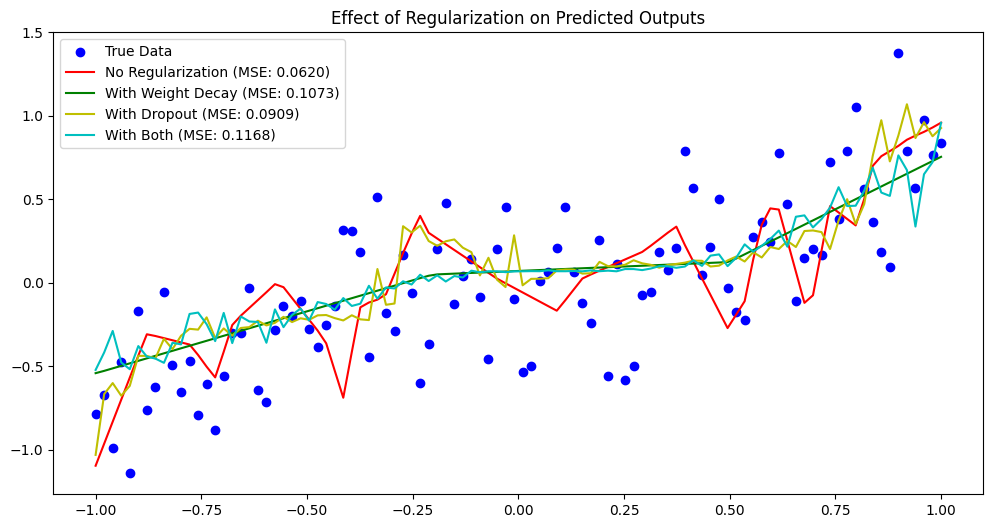

In [ ]:
# Modified training function for both dropout and weight decay
def train_model_with_both(dropout_rate=0.5, weight_decay=0.01):
    model = SimpleNN(dropout=True)
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
    criterion = nn.MSELoss()
    epochs = 2000

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

    # Calculate MSE for trained model
    mse = criterion(model(x_tensor), y_tensor).item()
    return model, mse

model_both, mse_both = train_model_with_both()

plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', label='True Data')
plt.plot(x, model_plain(x_tensor).detach().numpy(), 'r-', label=f'No Regularization (MSE: {mse_plain:.4f})')
plt.plot(x, model_weight_decay(x_tensor).detach().numpy(), 'g-', label=f'With Weight Decay (MSE: {mse_weight_decay:.4f})')
plt.plot(x, model_dropout(x_tensor).detach().numpy(), 'y-', label=f'With Dropout (MSE: {mse_dropout:.4f})')
plt.plot(x, model_both(x_tensor).detach().numpy(), 'c-', label=f'With Both (MSE: {mse_both:.4f})')
plt.legend()
plt.title('Effect of Regularization on Predicted Outputs')
plt.show()


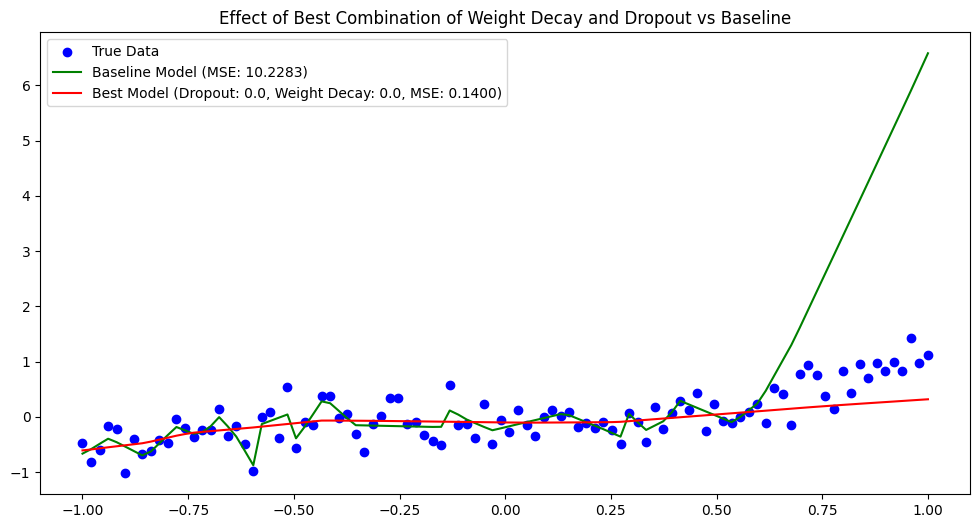

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# 1. Generate Synthetic Data
x = np.linspace(-1, 1, 100)[:, None]
y = x**3 + 0.3*np.random.randn(100)[:, None]

# Split data into training and validation
split = 80
x_train, x_val = x[:split], x[split:]
y_train, y_val = y[:split], y[split:]

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# 2. Neural Network Definition remains unchanged...
# 2. Define the Neural Network with both weight decay and dropout
class CombinedNN(nn.Module):
    def __init__(self, dropout_rate):
        super(CombinedNN, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# 3. Train models with combinations and compute validation MSE with early stopping
def train_with_combinations(dropout_rates, weight_decays, patience=100):
    criterion = nn.MSELoss()
    best_mse = float('inf')
    best_model = None
    best_params = None

    for dropout_rate in dropout_rates:
        for weight_decay in weight_decays:
            model = CombinedNN(dropout_rate)
            optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
            epochs = 2000
            best_loss_for_this_combination = float('inf')
            count_without_improvement = 0

            for epoch in range(epochs):
                optimizer.zero_grad()
                outputs = model(x_train_tensor)
                loss = criterion(outputs, y_train_tensor)
                loss.backward()
                optimizer.step()

                val_loss = criterion(model(x_val_tensor), y_val_tensor).item()

                # Early stopping check
                if val_loss < best_loss_for_this_combination:
                    best_loss_for_this_combination = val_loss
                    count_without_improvement = 0
                else:
                    count_without_improvement += 1
                    if count_without_improvement >= patience:
                        break

            if best_loss_for_this_combination < best_mse:
                best_mse = best_loss_for_this_combination
                best_model = model
                best_params = (dropout_rate, weight_decay)

    return best_model, best_params, best_mse

# Train a baseline model without regularization
baseline_model = CombinedNN(0)
optimizer = optim.Adam(baseline_model.parameters(), lr=0.01)
criterion = nn.MSELoss()
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = baseline_model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
mse_baseline = criterion(baseline_model(x_val_tensor), y_val_tensor).item()

# List of dropout rates and weight decay values to try
dropout_rates = [0.0, 0.2, 0.4, 0.5, 0.6]
weight_decays = [0.0, 0.01, 0.02, 0.05, 0.1]
best_model, best_params, best_mse = train_with_combinations(dropout_rates, weight_decays)

# 4. Visualization
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', label='True Data')
plt.plot(x, baseline_model(torch.tensor(x, dtype=torch.float32)).detach().numpy(), 'g-',
         label=f'Baseline Model (MSE: {mse_baseline:.4f})')
plt.plot(x, best_model(torch.tensor(x, dtype=torch.float32)).detach().numpy(), 'r-',
         label=f'Best Model (Dropout: {best_params[0]}, Weight Decay: {best_params[1]}, MSE: {best_mse:.4f})')
plt.legend()
plt.title('Effect of Best Combination of Weight Decay and Dropout vs Baseline')
plt.show()


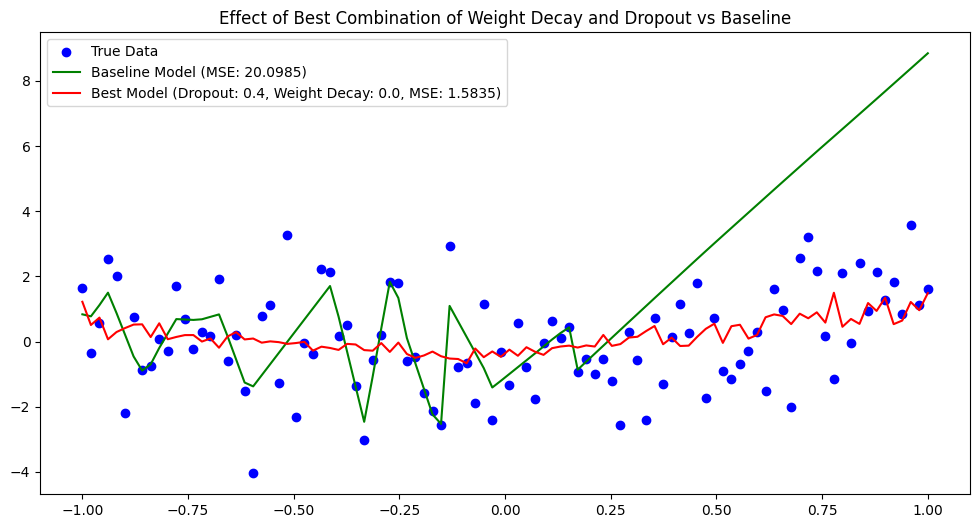

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# 1. Generate More Challenging Synthetic Data
x = np.linspace(-1, 1, 100)[:, None]
y = x**3 + 1.5*np.random.randn(100)[:, None]  # Increased noise

# Split data into training and validation with reduced training data
split = 60  # Only 60 points for training and 40 for validation
x_train, x_val = x[:split], x[split:]
y_train, y_val = y[:split], y[split:]

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# 2. Define a Larger Neural Network
class CombinedNN(nn.Module):
    def __init__(self, dropout_rate):
        super(CombinedNN, self).__init__()
        self.fc1 = nn.Linear(1, 200)  # Increased size
        self.fc2 = nn.Linear(200, 200)  # Increased size
        self.fc3 = nn.Linear(200, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Rest of the code remains unchanged...
# [ ... ]
# 3. Train models with combinations and compute validation MSE with early stopping
def train_with_combinations(dropout_rates, weight_decays, patience=100):
    criterion = nn.MSELoss()
    best_mse = float('inf')
    best_model = None
    best_params = None

    for dropout_rate in dropout_rates:
        for weight_decay in weight_decays:
            model = CombinedNN(dropout_rate)
            optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
            epochs = 2000
            best_loss_for_this_combination = float('inf')
            count_without_improvement = 0

            for epoch in range(epochs):
                optimizer.zero_grad()
                outputs = model(x_train_tensor)
                loss = criterion(outputs, y_train_tensor)
                loss.backward()
                optimizer.step()

                val_loss = criterion(model(x_val_tensor), y_val_tensor).item()

                # Early stopping check
                if val_loss < best_loss_for_this_combination:
                    best_loss_for_this_combination = val_loss
                    count_without_improvement = 0
                else:
                    count_without_improvement += 1
                    if count_without_improvement >= patience:
                        break

            if best_loss_for_this_combination < best_mse:
                best_mse = best_loss_for_this_combination
                best_model = model
                best_params = (dropout_rate, weight_decay)

    return best_model, best_params, best_mse

# Train a baseline model without regularization
baseline_model = CombinedNN(0)
optimizer = optim.Adam(baseline_model.parameters(), lr=0.01)
criterion = nn.MSELoss()
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = baseline_model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
mse_baseline = criterion(baseline_model(x_val_tensor), y_val_tensor).item()

# List of dropout rates and weight decay values to try
dropout_rates = [0.0, 0.2, 0.4, 0.5, 0.6]
weight_decays = [0.0, 0.01, 0.02, 0.05, 0.1]
best_model, best_params, best_mse = train_with_combinations(dropout_rates, weight_decays)

# 4. Visualization
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', label='True Data')
plt.plot(x, baseline_model(torch.tensor(x, dtype=torch.float32)).detach().numpy(), 'g-',
         label=f'Baseline Model (MSE: {mse_baseline:.4f})')
plt.plot(x, best_model(torch.tensor(x, dtype=torch.float32)).detach().numpy(), 'r-',
         label=f'Best Model (Dropout: {best_params[0]}, Weight Decay: {best_params[1]}, MSE: {best_mse:.4f})')
plt.legend()
plt.title('Effect of Best Combination of Weight Decay and Dropout vs Baseline')
plt.show()


# Train and Visualize as before
# [ ... ]



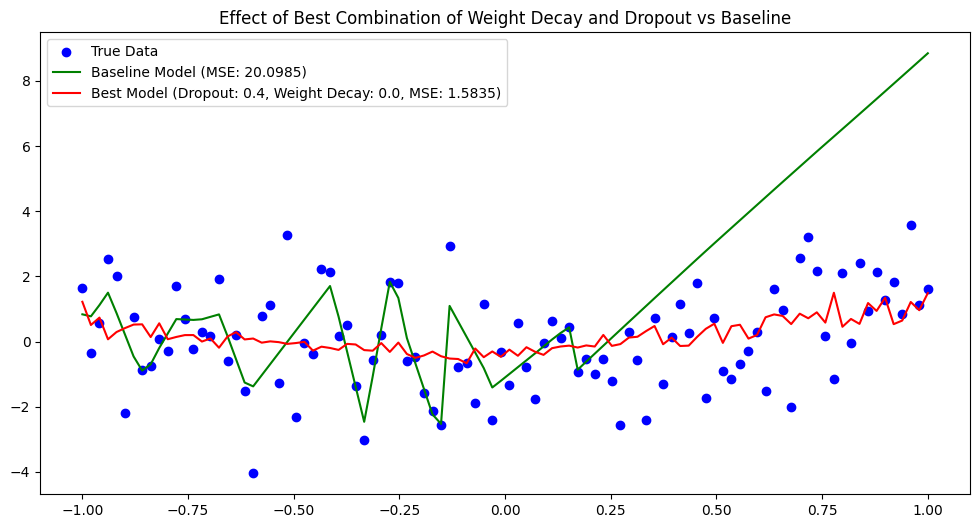

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# 1. Generate More Challenging Synthetic Data
x = np.linspace(-1, 1, 100)[:, None]
y = x**3 + 1.5*np.random.randn(100)[:, None]  # Increased noise

# Split data into training and validation with reduced training data
split = 60  # Only 60 points for training and 40 for validation
x_train, x_val = x[:split], x[split:]
y_train, y_val = y[:split], y[split:]

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# 2. Define a Larger Neural Network
class CombinedNN(nn.Module):
    def __init__(self, dropout_rate):
        super(CombinedNN, self).__init__()
        self.fc1 = nn.Linear(1, 200)  # Increased size
        self.fc2 = nn.Linear(200, 200)  # Increased size
        self.fc3 = nn.Linear(200, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Training function with early stopping remains unchanged...
# [ ... ]

# Train a baseline model without regularization
baseline_model = CombinedNN(0)
optimizer = optim.Adam(baseline_model.parameters(), lr=0.01)
criterion = nn.MSELoss()
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = baseline_model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
mse_baseline = criterion(baseline_model(x_val_tensor), y_val_tensor).item()

# List of dropout rates and weight decay values to try
dropout_rates = [0.0, 0.2, 0.4, 0.5, 0.6]
weight_decays = [0.0, 0.01, 0.02, 0.05, 0.1]
best_model, best_params, best_mse = train_with_combinations(dropout_rates, weight_decays)

# 4. Visualization
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', label='True Data')
plt.plot(x, baseline_model(torch.tensor(x, dtype=torch.float32)).detach().numpy(), 'g-',
         label=f'Baseline Model (MSE: {mse_baseline:.4f})')
plt.plot(x, best_model(torch.tensor(x, dtype=torch.float32)).detach().numpy(), 'r-',
         label=f'Best Model (Dropout: {best_params[0]}, Weight Decay: {best_params[1]}, MSE: {best_mse:.4f})')
plt.legend()
plt.title('Effect of Best Combination of Weight Decay and Dropout vs Baseline')
plt.show()


4/4 [==============================] - 0s 4ms/step


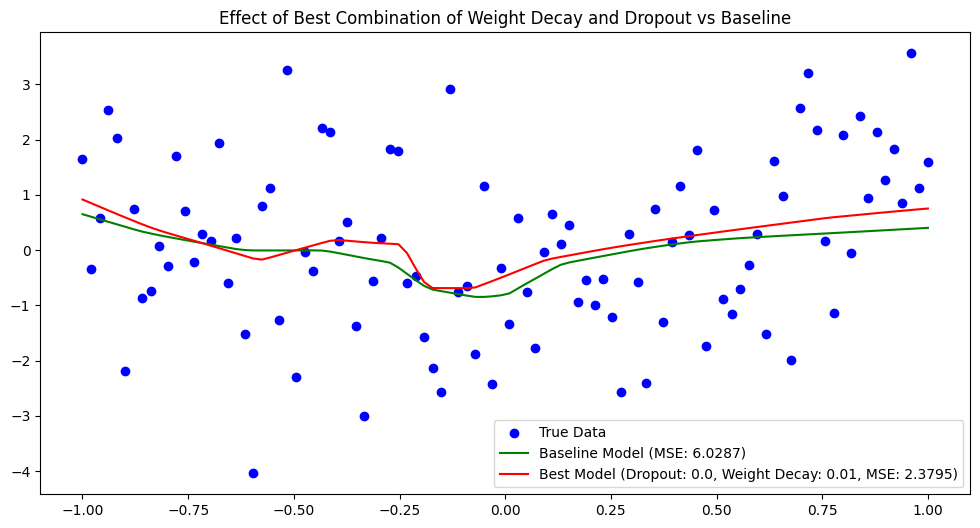

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Ensure reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# 1. Generate More Challenging Synthetic Data
x = np.linspace(-1, 1, 100)[:, None]
y = x**3 + 1.5*np.random.randn(100)[:, None]  # Increased noise

# Split data into training and validation with reduced training data
split = 60  # Only 60 points for training and 40 for validation
x_train, x_val = x[:split], x[split:]
y_train, y_val = y[:split], y[split:]

# 2. Define a Larger Neural Network using Keras
def create_model(dropout_rate=0.0):
    model = keras.models.Sequential([
        keras.layers.Dense(200, activation='relu', input_shape=(1,)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dense(1)
    ])
    return model

# 3. Training function
def train_model(model, x_train, y_train, x_val, y_val, epochs=2000, patience=100):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=0, callbacks=[early_stopping])
    return model, history.history['val_loss'][-1]

# Train a baseline model without regularization
baseline_model = create_model()
baseline_model, mse_baseline = train_model(baseline_model, x_train, y_train, x_val, y_val)

# Finding the best combination of dropout and weight decay
dropout_rates = [0.0, 0.2, 0.4, 0.5, 0.8,0.9]
weight_decays = [0.0, 0.01, 0.02, 0.04,0.06, 0.1]
best_mse = float('inf')
best_params = None
best_model = None

for dropout_rate in dropout_rates:
    for weight_decay in weight_decays:
        model = create_model(dropout_rate)
        # Applying weight decay (L2 regularization) in TensorFlow
        for layer in model.layers:
            if isinstance(layer, keras.layers.Dense):
                layer.add_loss(lambda: tf.keras.regularizers.l2(weight_decay)(layer.kernel))
        model, mse = train_model(model, x_train, y_train, x_val, y_val)
        if mse < best_mse:
            best_mse = mse
            best_params = (dropout_rate, weight_decay)
            best_model = model

# 4. Visualization
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', label='True Data')
plt.plot(x, baseline_model.predict(x), 'g-', label=f'Baseline Model (MSE: {mse_baseline:.4f})')
plt.plot(x, best_model.predict(x), 'r-', label=f'Best Model (Dropout: {best_params[0]}, Weight Decay: {best_params[1]}, MSE: {best_mse:.4f})')
plt.legend()
plt.title('Effect of Best Combination of Weight Decay and Dropout vs Baseline')
plt.show()
